### Modelo AlexNet from Scratch en TF/Keras

En este notebook se programo el modelo de AlexNet desde cero y se entrena con el dataset de CIFAR-10

In [ ]:
# Importamos las librerias necesarias

import keras
import keras.layers as layers
from keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt

2025-03-07 18:20:24.119297: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-07 18:20:24.126669: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741393224.134031   46233 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741393224.136200   46233 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 18:20:24.145577: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [ ]:
# Cargamos el dataset CIFAR-10 desde keras y le damos un formato adecuado

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

y_train, y_test = y_train.flatten(), y_test.flatten()

x_train, x_test = (x_train/255.0)*2 - 1, (x_test/255.0)*2 - 1



In [ ]:
# Creamos el modelo de la red neuronal

model= tf.keras.Sequential([layers.Resizing(227,227,data_format='channels_last',input_shape=(32,32,3)),
                                      layers.Conv2D(filters=96, kernel_size=11, strides=4,activation='relu',input_shape=(227,227,3)),
                                      layers.MaxPooling2D(pool_size=3, strides=2),

                                      layers.Conv2D(filters=256, kernel_size=5, padding='same',activation='relu'),
                                      layers.MaxPooling2D(pool_size=3, strides=2),

                                      layers.Conv2D(filters=384, kernel_size=3,  padding='same',activation='relu'),
                                      layers.Conv2D(filters=384, kernel_size=3,  padding='same',activation='relu'),
                                      layers.Conv2D(filters=256, kernel_size=3,  padding='same',activation='relu'),
                                      layers.MaxPooling2D(pool_size=3, strides=2),

                                      layers.Flatten(),
                                      layers.Dense(4096,activation='relu'),
                                      layers.Dropout(0.5),

                                      layers.Dense(4096,activation='relu'),
                                      layers.Dropout(0.5),

                                      layers.Dense(10,activation='softmax')
                                      ])

model.summary()



/home/oswaldo/Documents/Proyectos/Python/AlexNet_Challenge/env/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/oswaldo/Documents/Proyectos/Python/AlexNet_Challenge/env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1741393226.292580   46233 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4917 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 227, 227, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilamos el modelo y definimos la funcion de perdida, el optimizador y las metricas

model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

In [ ]:
# Es hora de entrenar el modelo, usaremos 15 epocas y un batch de 64

history= model.fit(x_train, y_train, epochs=15,batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15


I0000 00:00:1741393227.807419   46283 service.cc:148] XLA service 0x7a0abc00fb30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741393227.807441   46283 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2025-03-07 18:20:27.826559: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741393227.938936   46283 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.0745 - loss: 2.3046

I0000 00:00:1741393233.063387   46283 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3620 - loss: 1.7218

2025-03-07 18:21:02.912456: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_223', 196 bytes spill stores, 196 bytes spill loads

2025-03-07 18:21:03.119575: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_230', 104 bytes spill stores, 104 bytes spill loads

2025-03-07 18:21:03.157697: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_223', 236 bytes spill stores, 236 bytes spill loads

2025-03-07 18:21:03.337981: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_230', 408 bytes spill stores, 408 bytes spill loads

2025-03-07 18:21:06.416388: I external/local_xla/xla/str

782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.3621 - loss: 1.7214 - val_accuracy: 0.6520 - val_loss: 0.9924
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6611 - loss: 0.9607 - val_accuracy: 0.7211 - val_loss: 0.8002
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7620 - loss: 0.6863 - val_accuracy: 0.7659 - val_loss: 0.6777
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8223 - loss: 0.5161 - val_accuracy: 0.7878 - val_loss: 0.6361
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.8695 - loss: 0.3816 - val_accuracy: 0.8023 - val_loss: 0.6088
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.9047 - loss: 0.2742 - val_accuracy: 0.8132 - val_loss: 0.5994
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.9384 - loss: 0.1802 - val_accuracy: 0.8072 - val_loss: 0.6968
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.9567 - loss: 0.1303 - val_accurac

Text(0.5, 1.0, 'Train - Accuracy')

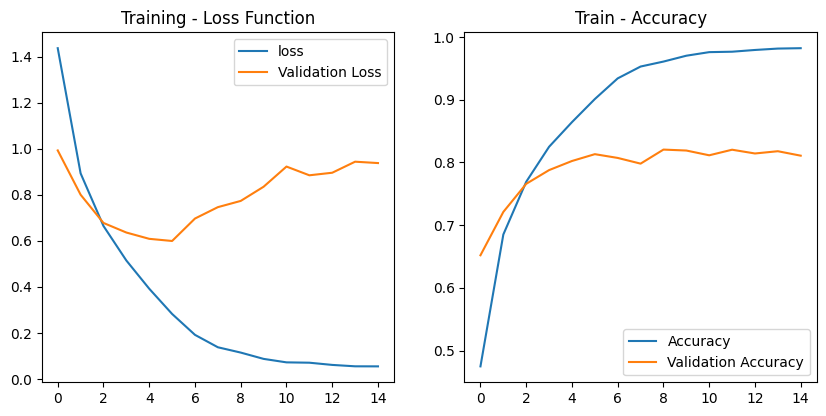

In [6]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [7]:
model_evaluation_results = model.evaluate(x_test, y_test, batch_size=32, verbose=2)
print("The test loss is", model_evaluation_results[0])
print("The test accuracy is", model_evaluation_results[1])

2025-03-07 18:29:00.846022: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_223', 196 bytes spill stores, 196 bytes spill loads

2025-03-07 18:29:00.981122: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_223', 236 bytes spill stores, 236 bytes spill loads

2025-03-07 18:29:01.031991: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_230', 408 bytes spill stores, 408 bytes spill loads

2025-03-07 18:29:01.123059: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_230', 104 bytes spill stores, 104 bytes spill loads



313/313 - 3s - 11ms/step - accuracy: 0.8108 - loss: 0.9376
The test loss is 0.9375538229942322
The test accuracy is 0.8108000159263611


Se obtuvo un accuracy de 81%!!!